**Welcome to your first assignment of Summer Analytics 2023! We hope you are excited to implement and test everything you have learnt up until now.<a href = "https://drive.google.com/file/d/1U73P58VAc4EXM98Or9feKnVx9I9FOP_L/view?usp=sharing"> The dataset</a> which you'll use includes information about Movies.**

 We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!
 
Let's get started with importing numpy, pandas, seaborn and matplotlib! 

Note - matplotlib should be imported with the command :

**import matplotlib.pyplot as plt**

Start by importing all important libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the csv file and assign it to a variable .

In [184]:
df = pd.read_csv('imdb_top_1000.csv')

Display shape of dataframe

In [185]:
df.shape

(1000, 16)

Print all columns of dataframe

In [186]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Remove the column 'Poster_Link' and update the dataframe.

In [187]:
df.drop(['Poster_Link'],axis = 1,inplace = True)

Set the 'Series_Title' column as the index of dataframe

In [188]:
df.set_index('Series_Title',inplace = True)

Print a list of all the unique Genre

In [189]:
df['Genre'].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

1. What is the Number of Directors in the given dataset ? 

In [190]:
print(len(df['Director'].value_counts()))
print(len(df.Director.unique()))

548
548


2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [191]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [192]:
print(df['IMDB_Rating'].mean())
print(df['IMDB_Rating'].median())
print(df['IMDB_Rating'].std())

7.949299999999999
7.9
0.2754912074920095


3. Which director has directed the most number of movies?

In [193]:
print(df['Director'].value_counts())
director = list(df['Director'])
s = ""
res = -1
for i in range(len(director)):
  if(director.count(director[i]) > res):
    s = director[i]
    res = director.count(director[i])
print(s)
print(res)

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64
Alfred Hitchcock
14


4. Name the Movie which has the highest Runtime ?

In [194]:
runtime = list(df['Runtime'])
highest_runtime = max(runtime)
index = runtime.index(highest_runtime)
print(index)
df.index[103]

103


'Reservoir Dogs'

5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [195]:
df.head(1)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Series_Title,,,,,,,,,,,,,,
The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [196]:
released_year = np.array(df['Released_Year'])
imdb_rating = np.array(df['IMDB_Rating'])
year = []
# print(released_year)
for i in range(len(released_year)):
  if(released_year[i] == 'PG'):
    year.append(0)
  else:
    year.append(int(released_year[i]))
count = 0
for i in range(len(year)):
  if(year[i] > 2000 and imdb_rating[i] > 8.5):
    count = count + 1
print(count)

11


Using seaborn make different types of plots, observe the trend and answer the questions.
6. Make a countplot of Movies directed by top 5 directors.

In [197]:
director_top5 = df['Director'].value_counts()
director_top5

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

<Axes: xlabel='Director', ylabel='count'>

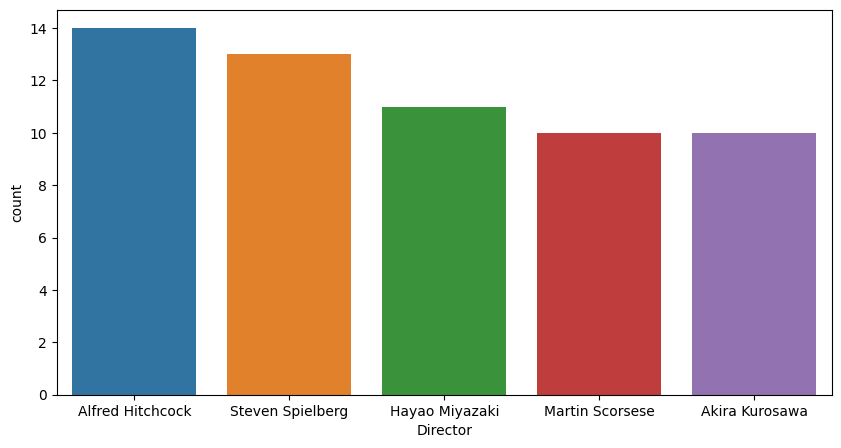

In [198]:
import seaborn as sns
plt.figure(figsize=(10,5))
# titanic = sns.load_dataset("titanic")
sns.countplot(x='Director', data=df,
              order=df.Director.value_counts().iloc[:5].index)


7. Make a plot to analyze distribution of IMDB rating?

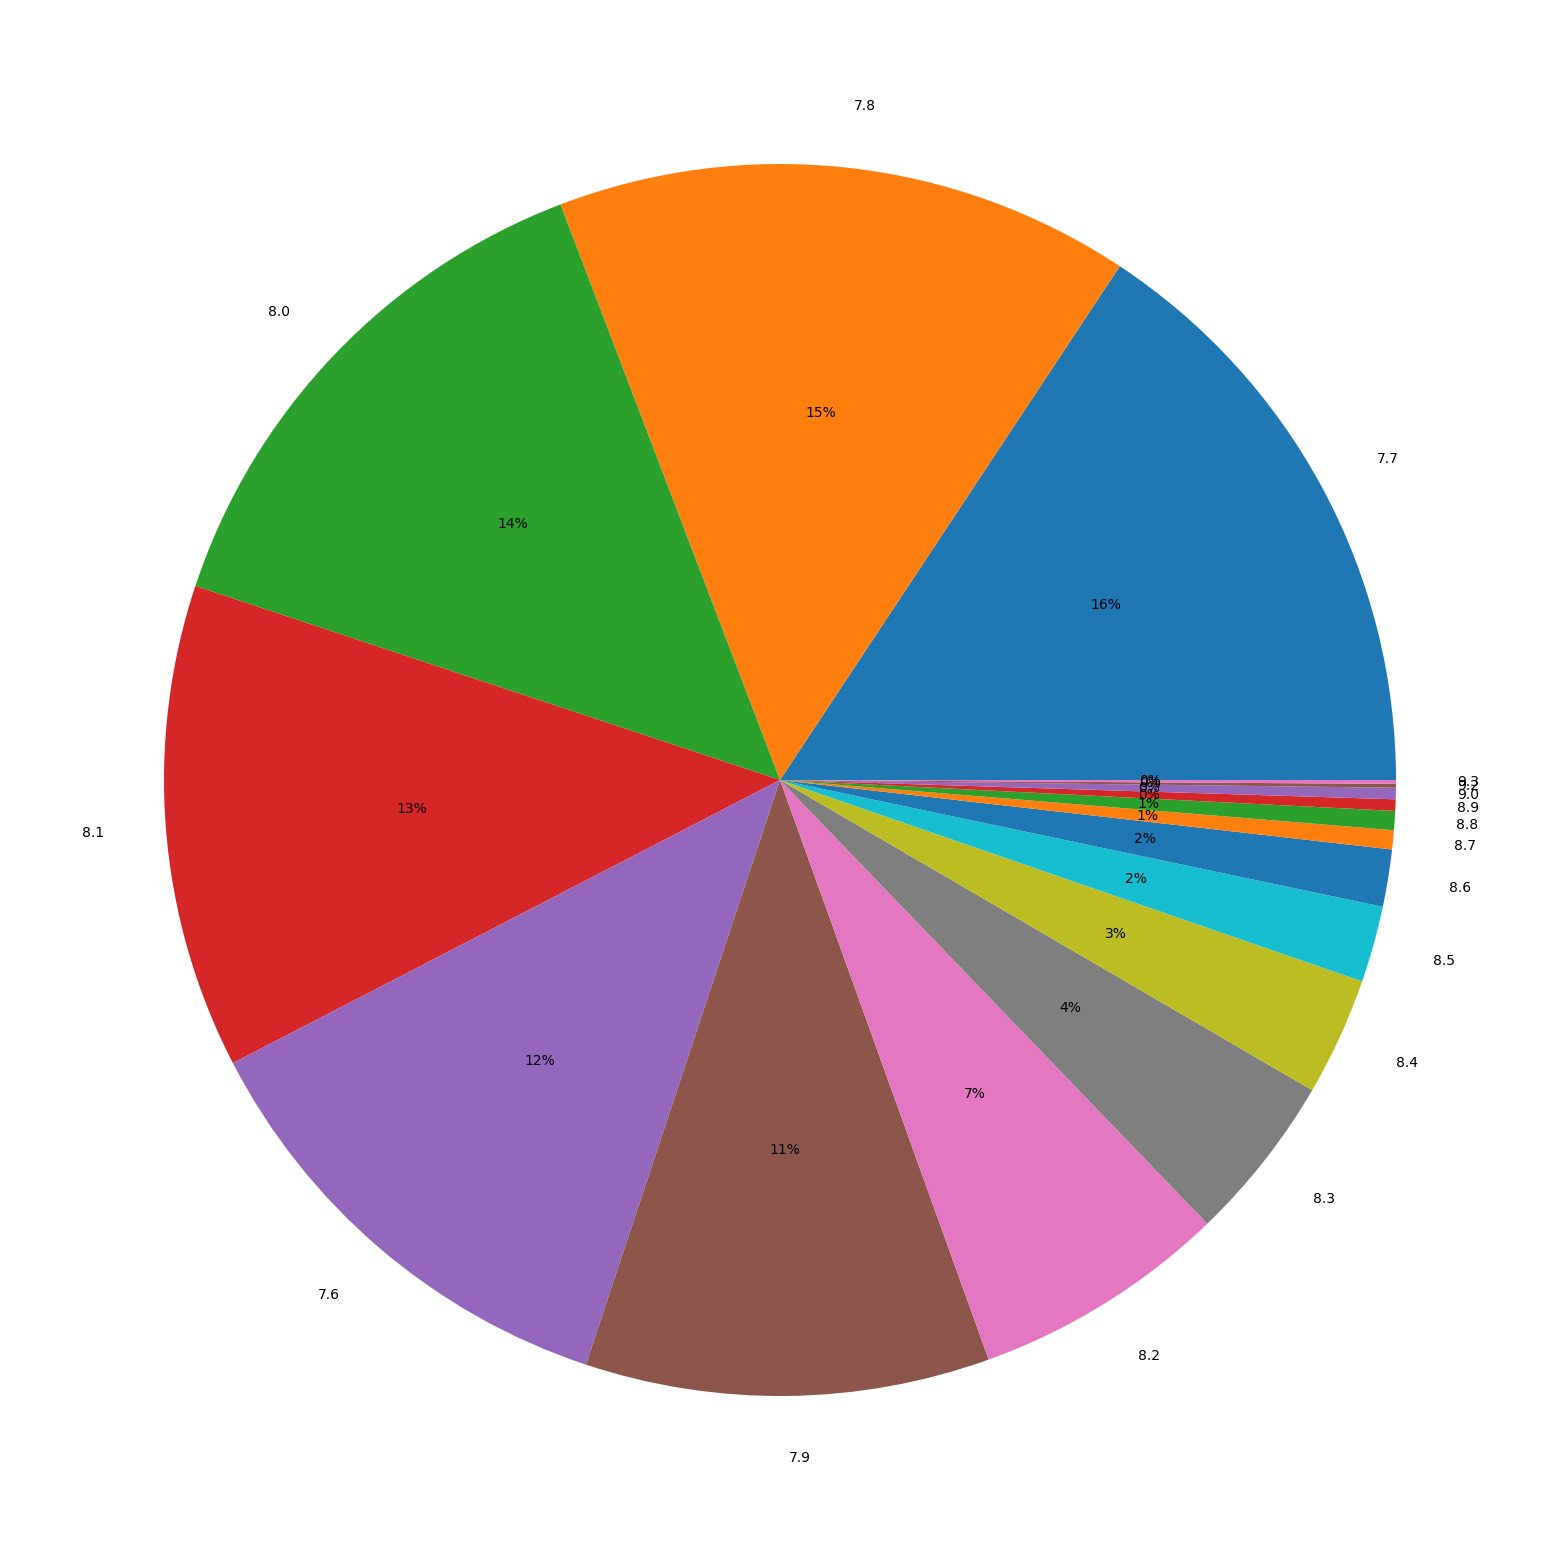

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64


In [199]:
data_imdb = df['IMDB_Rating'].value_counts()
data = np.array(data_imdb.keys())
data

data_imdb_count = np.array(data_imdb)
data_imdb_count

sum = 0
for i in range(len(data_imdb_count)):
  sum = sum + data_imdb_count[i]

data_percent = []
for i in range(len(data_imdb_count)):
  data_percent.append((data_imdb_count[i]/1000) * 100)
data_percent

plt.figure(figsize=(20,20))
plt.pie(data_percent,labels=data,autopct='%.0f%%')
plt.show()

print(data_imdb)

8. What type of Genre has the highest IMDB rating?

In [200]:
imdb = list(df['IMDB_Rating'])
highest_imdb = max(imdb)
highest_imdb_index  = imdb.index(highest_imdb)
genre = list(df['Genre'])
print(genre[highest_imdb_index]) 


Drama


9. Name the top 5 movies that have earned highest Meta score. 

In [201]:
meta_score = []
t = df['Meta_score'].fillna(0)
t.isnull().any()
t = list(t)
t = np.array(t)
for i in range(len(t)):
  meta_score.append(t[i])
meta_score.sort(reverse=True)

In [202]:
meta_score_index = []
for i in range(len(t)):
  if(t[i] == 100):
    meta_score_index.append(i)
meta_score_index = meta_score_index[0:6]
# print(meta_score_index)

movie = np.array(df.index)
# print(len(movie))
movie_top5 = []
for i in range(len(meta_score_index)):
  movie_top5.append(movie[meta_score_index[i]])
movie_top5

['The Godfather',
 'Casablanca',
 'Rear Window',
 'Lawrence of Arabia',
 'Vertigo',
 'Citizen Kane']

10. Of which Genre movie has the highest Runtime?

In [203]:
data_runtime = list(df['Runtime'])
runtime = []
for i in range(len(data_runtime)):
  y = int(data_runtime[i].split(" ")[0])
  runtime.append(y)

res = -1
index = 0
for i in range(len(runtime)):
  if(runtime[i] > res):
    res = runtime[i]
    index = i
# print(res,index)

genre = np.array(df['Genre'])
# print(genre)
print(genre[index])
# data_runtime[0].split(" ")[0]

Action, Comedy, Crime
